In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [180]:
%matplotlib inline

In [181]:
train=pd.read_csv("train.csv")

In [182]:
test=pd.read_csv("test.csv")

In [183]:
train.columns=['x','y']

In [184]:
test.columns=['x','y']

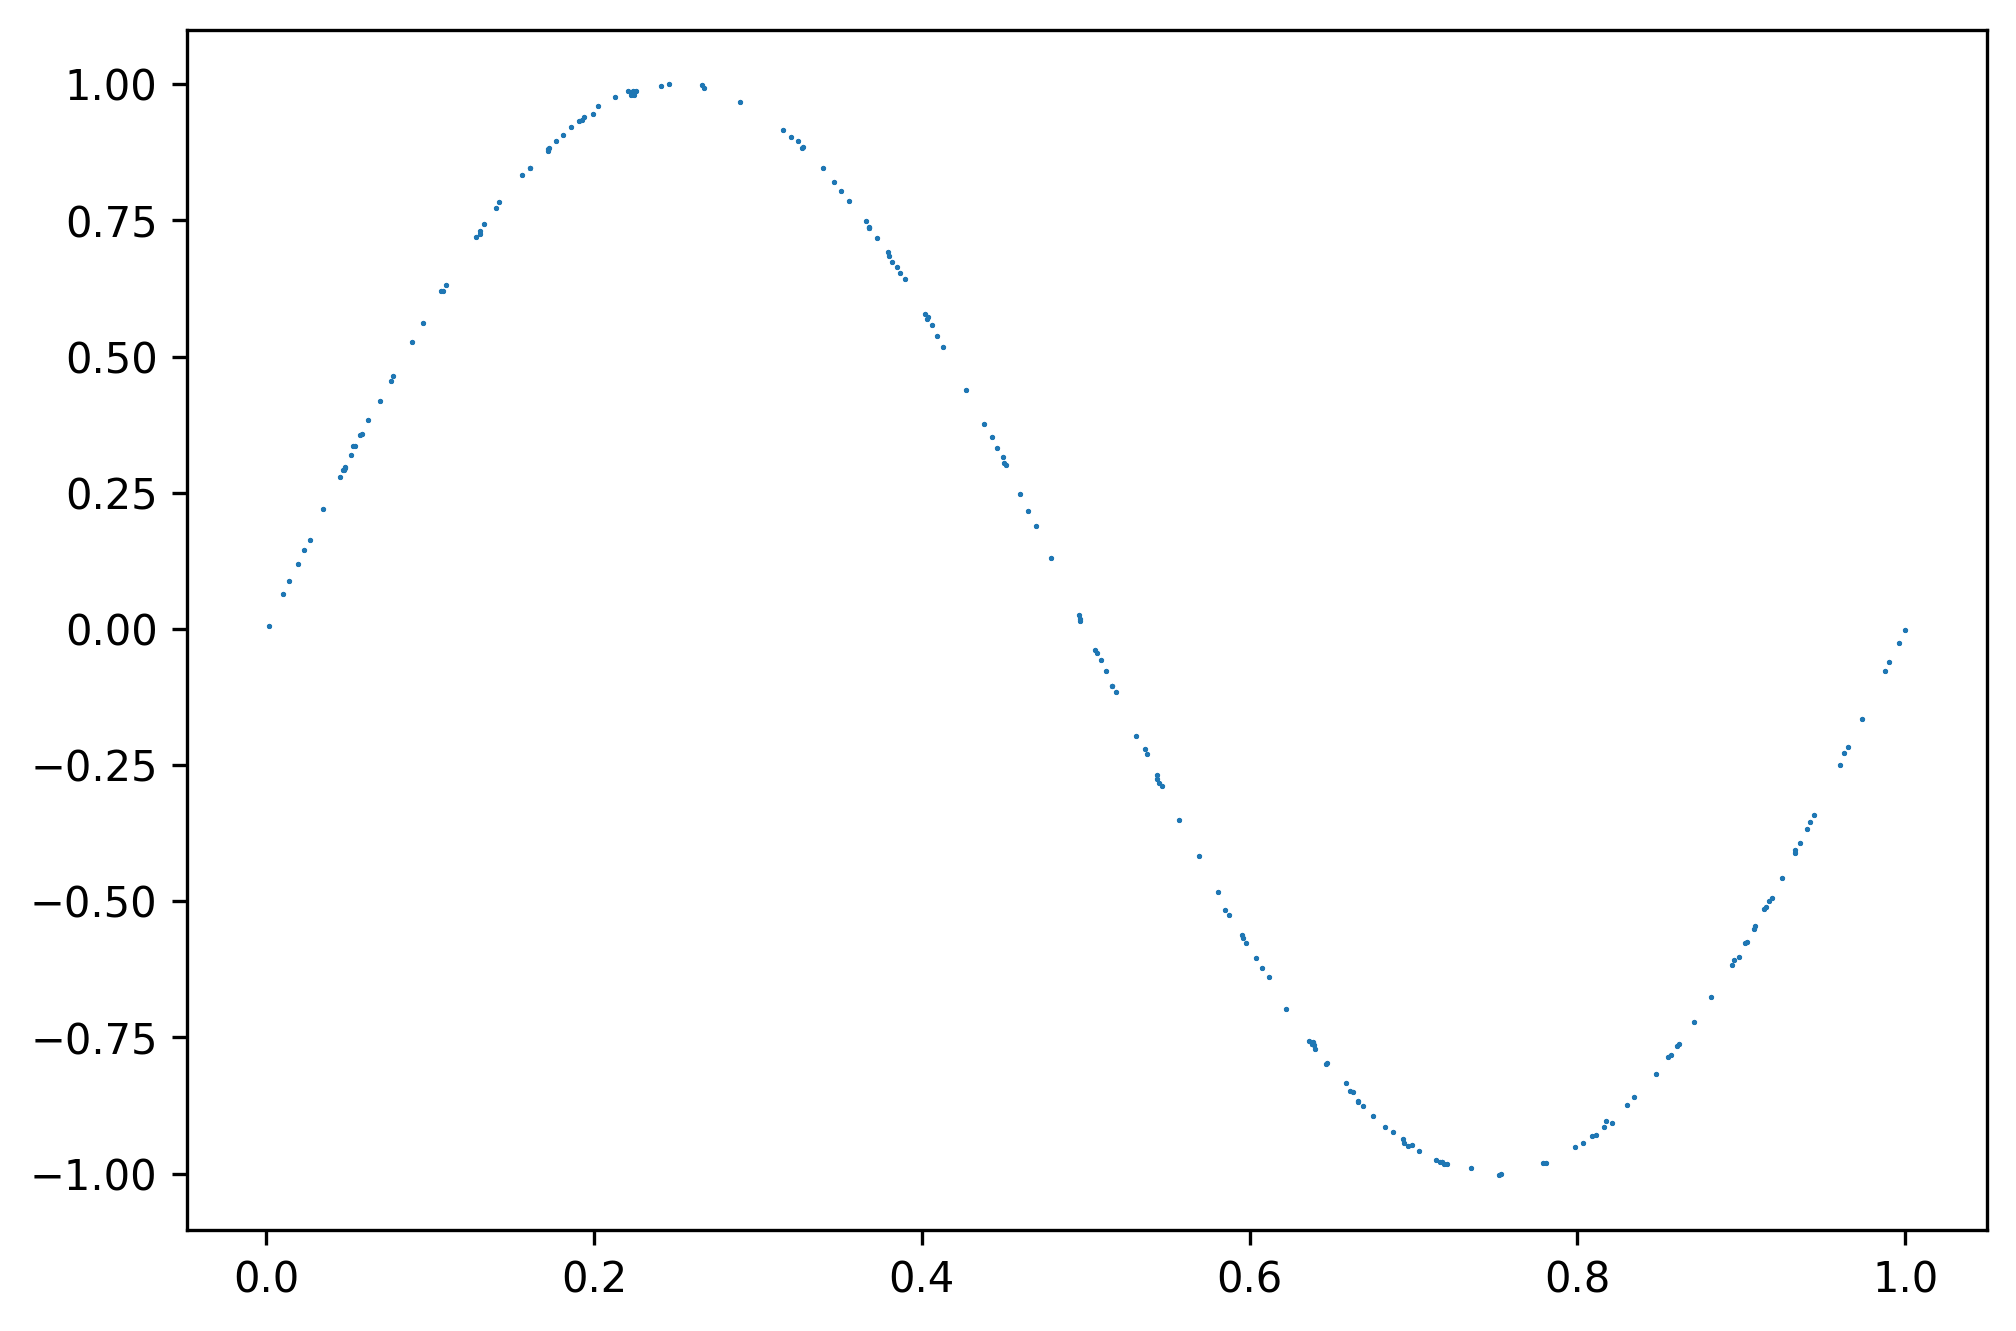

In [185]:
feature_test=test['x']
x_test=feature_test.to_numpy()
outputs_test=test['y']
y_test=outputs_test.to_numpy()
#plotting testing data

figt=plt.figure(dpi=300)
axt=figt.add_axes([0,0,1,1])
axt.scatter(x_test,y_test,s=.1,alpha=1,marker="*")

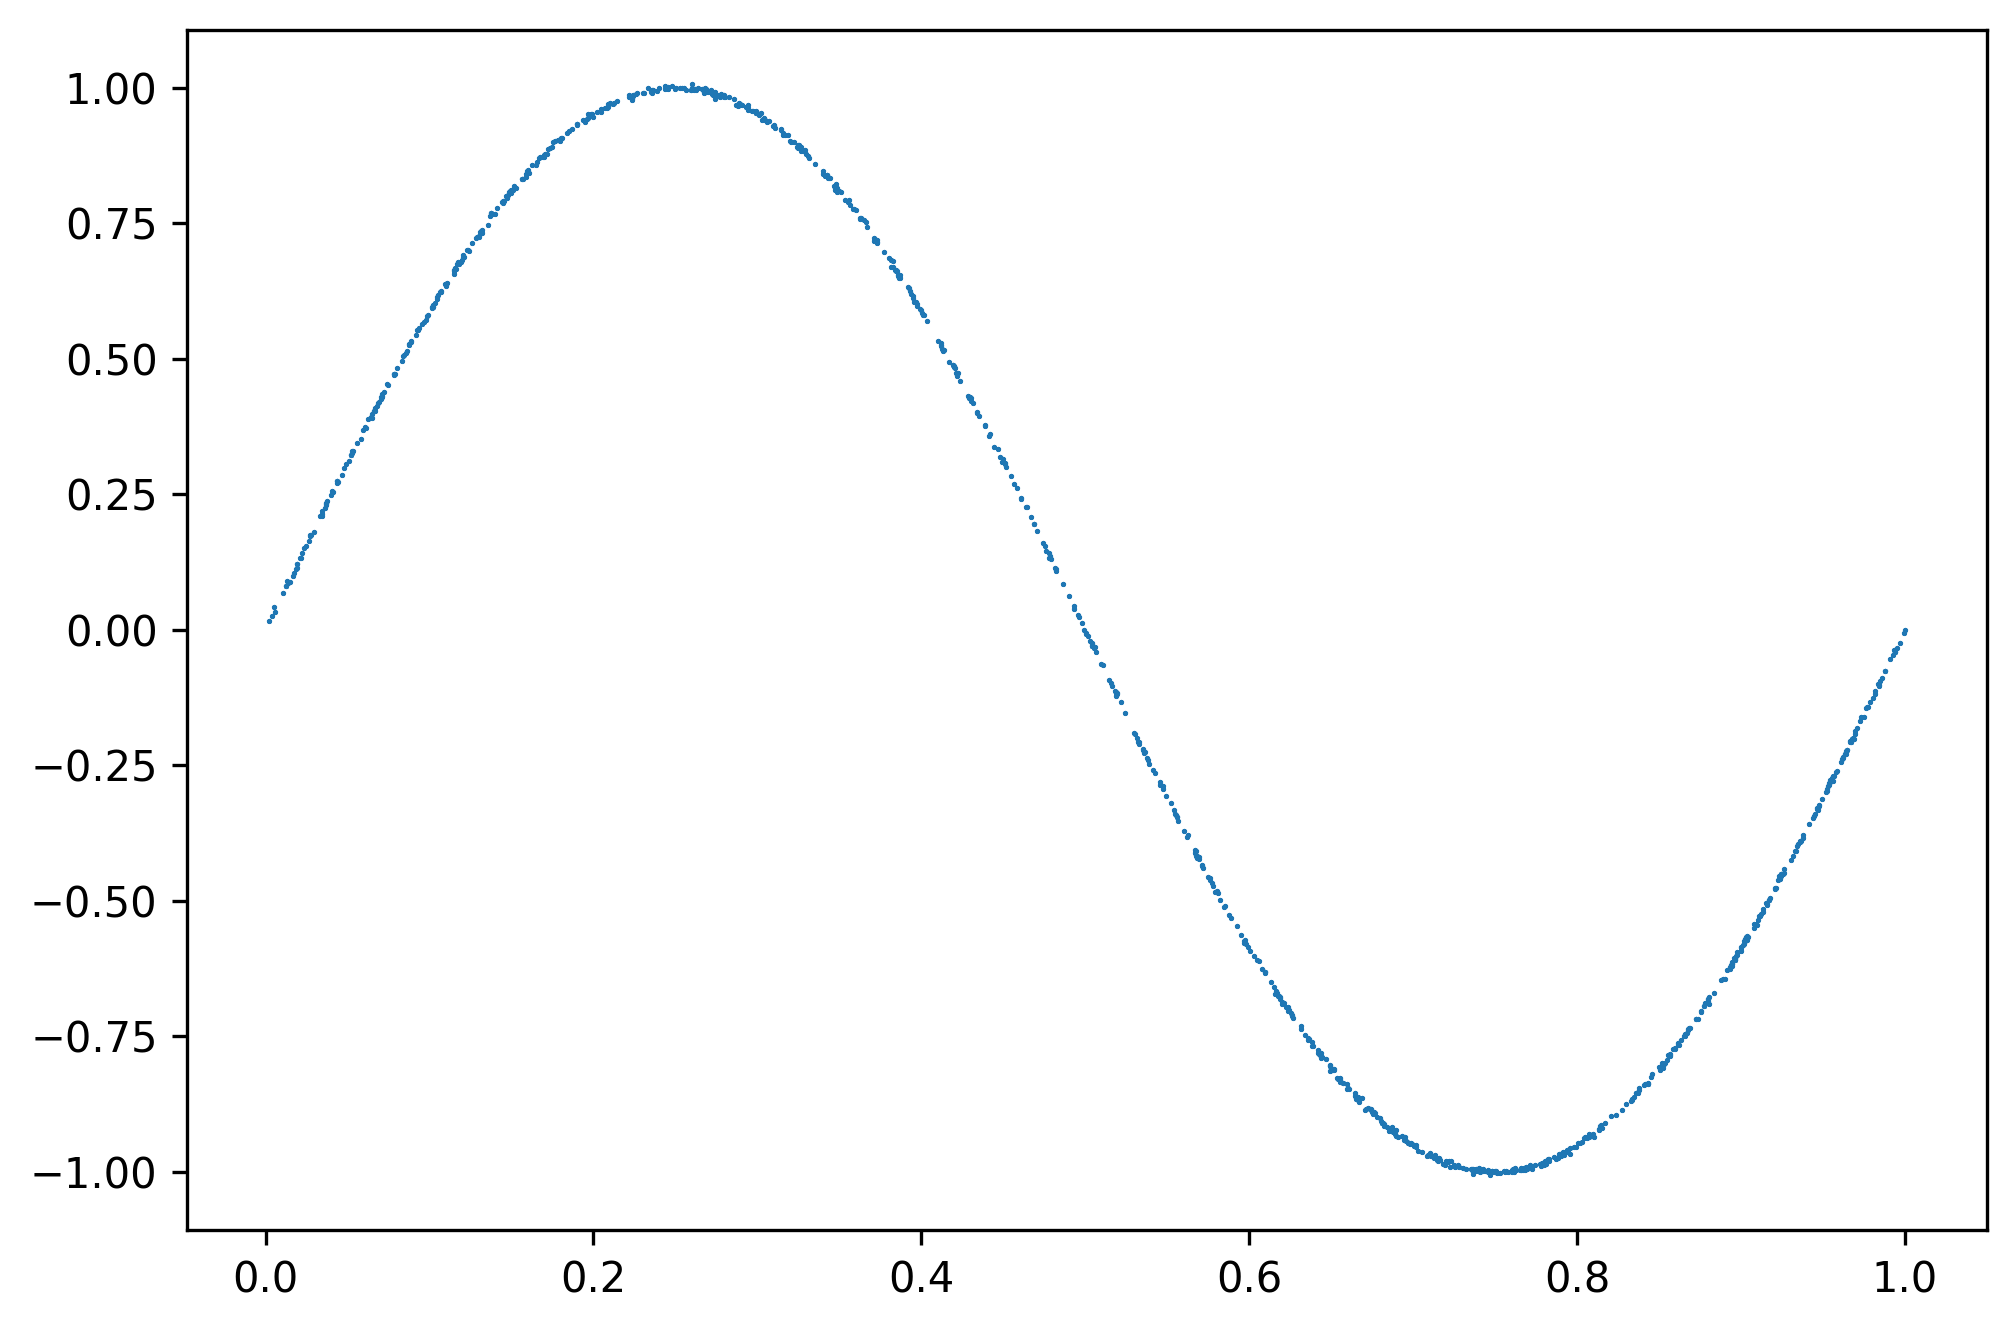

In [186]:
feature=train['x']
outputs=train['y']
y=outputs.to_numpy()
y=y.reshape(y.size,1)
x=feature.to_numpy()
x=x.reshape(x.size,1)

#plotting training data
fig=plt.figure(dpi=300)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x,y,s=.1,alpha=1,marker="*")

In [160]:
x=np.insert(x,0,1,1)

In [161]:
x_new=np.zeros((x.shape[0],10))

In [162]:
x_new[:,:2]=x

In [163]:
x_new[:,2:]=x[:,1:2]

In [164]:
x_new[:,2:]=np.power(x_new[:,2:],np.arange(2,10,1))

In [165]:
x_new

array([[1.00000000e+00, 9.63585219e-01, 9.28496473e-01, ...,
        7.71313450e-01, 7.43226240e-01, 7.16161819e-01],
       [1.00000000e+00, 7.15377267e-01, 5.11764635e-01, ...,
        9.58839570e-02, 6.85932031e-02, 4.90700182e-02],
       [1.00000000e+00, 8.96297852e-01, 8.03349839e-01, ...,
        4.64693383e-01, 4.16503681e-01, 3.73311354e-01],
       ...,
       [1.00000000e+00, 7.86101700e-01, 6.17955882e-01, ...,
        1.85503089e-01, 1.45824294e-01, 1.14632725e-01],
       [1.00000000e+00, 5.08456818e-02, 2.58528336e-03, ...,
        8.78574361e-10, 4.46717124e-11, 2.27136367e-12],
       [1.00000000e+00, 4.29965082e-01, 1.84869972e-01, ...,
        2.71664137e-03, 1.16806093e-03, 5.02225413e-04]])

Feature Scaling

In [166]:
st_dev=np.zeros(10)

In [167]:
np.std(x_new,axis=0,out=st_dev)

array([0.        , 0.29799118, 0.31019431, 0.29646781, 0.28011356,
       0.2648319 , 0.25114729, 0.23896027, 0.22807019, 0.21828777])

In [168]:
st_dev[0]=1

In [169]:
averages=np.zeros(10)

In [170]:
np.mean(x_new,axis=0,out=averages)

array([1.        , 0.52119056, 0.36043835, 0.27758768, 0.22613631,
       0.19079834, 0.16494808, 0.14519442, 0.12960124, 0.11697551])

In [171]:
averages[0]=0

In [172]:
x_scaled=(x_new-averages)/st_dev

In [219]:
h_theta=np.zeros((1000,1))
errors=np.zeros((1000,1))
test_error_final=np.zeros(9)

In [220]:
m

1000

In [235]:
thetas=[np.zeros((i,1)) for i in range(2,11,1)]
alpha=.05
m=x_scaled.shape[0]
for i in range(2,11,1):
    prev_error=float('inf')
    theta=thetas[i-2]
    while(True):
        h_theta=np.matmul(x_scaled[:,:i],thetas[i-2])
        errors=h_theta-y
        curr_error=np.sum(errors**2)/(2*m)
        if(prev_error-curr_error<.0000001):
            print(curr_error)
            break
        prev_error=curr_error
        thetas[i-2]=thetas[i-2]-(alpha/m)*np.matmul(x_scaled[:,:i].transpose(),errors)

0.09967995445451121
0.09913670178586954
0.003166589390330016
0.004724075791399693
0.008788622181228646
0.0037667049130586925
0.0018333147766559298
0.0011517440251170264
0.001181796448435286


In [177]:
x.shape[0]

1000

In [221]:
alpha=.05
prev_error=float("inf")
theta=np.zeros(10)
theta.resize((10,1))
m=x.shape[0]
while(True):
    h_theta=np.matmul(x_scaled,theta)
    errors=h_theta-y
    curr_error=np.sum(errors**2)/(2*m)
    #print("curr_error is ")
    #print(curr_error)
    if(prev_error-curr_error<.0000001):
        break
    prev_error=curr_error
    theta=theta-(alpha/m)*np.matmul(x_scaled.transpose(),errors)
    

In [222]:
curr_error

0.001181796448435286